### 1.Import data into Python environment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("comcastdata.csv")

In [3]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
data.tail()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2223,363614,"Comcast, Ypsilanti MI Internet Speed",24-06-15,24-Jun-15,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes


In [5]:
data.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null object
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [7]:
print(data.shape)

(2224, 11)


In [8]:
total=2224

In [9]:
data.nunique()

Ticket #                       2224
Customer Complaint             1841
Date                             91
Date_month_year                  91
Time                           2190
Received Via                      2
City                            928
State                            43
Zip code                       1543
Status                            4
Filing on Behalf of Someone       2
dtype: int64

In [10]:
data.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

### 3.Table with the frequency of complaint types. 

In [11]:
#complaint variable get the type of the complaint and its count of its occurences(frequency)
complaint=data['Customer Complaint'].value_counts()
print(complaint.head(20))

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Billing             11
Comcast Data Caps           11
Data Caps                   11
Unfair Billing Practices     9
Data Cap                     8
Comcast data cap             8
Comcast data caps            8
Comcast internet             8
Internet speed               8
Comcast/Xfinity              8
Comcast service              6
Comcast billing              6
COMCAST                      6
Billing                      6
Comcast Service              6
Internet Speed               5
Name: Customer Complaint, dtype: int64


### 4. Maximum complaint type and their value


In [12]:
#temp2,temp1 variable will have maximum and the value or index which has the maximum value 
temp1=complaint.idxmax()
temp2=complaint.max()
print("maxcomplainttype->{}and maxamount->{}".format(temp1,temp2))

maxcomplainttype->Comcastand maxamount->83


### 2.Trend chart for the number of complaints at monthly and daily granularity levels.

In [13]:
#new data variable is to copy the existing dataset and the operation to find the trend of the complaints based on the month 
#and date will be done with help of the newdata dataframe which will not reflect in the maindataset variable(data)
new_data=data.copy()

#converting the object datatype to date datatype to perform inbuilt function
new_data['Date_month_year']=pd.to_datetime(new_data['Date_month_year'])


In [14]:
#creating a column in new_data using the inbuilt function to give  month and date
new_data['month']=new_data['Date_month_year'].dt.month
new_data['date']=new_data['Date_month_year'].dt.day
new_data.head()


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,date
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26


In [15]:
#analysing the count of the complaints for months

x=new_data['month'].value_counts()
monthly_graph=pd.DataFrame(x)

#renaming  the column name to get better understanding
monthly_graph=monthly_graph.rename(columns={"month":"no_of_complaints"})
monthly_graph['month']=monthly_graph.index
monthly_graph.head()

#sorting the values based on the month to get clear insights about the month and count of the complaints
monthly_graph.sort_values("month")

,no_of_complaints,month
1,55,1
2,59,2
3,45,3
4,375,4
5,317,5
6,1046,6
7,49,7
8,67,8
9,55,9
10,53,10


In [16]:
#analysing the count of the complaints for dates
y=new_data['Date_month_year'].value_counts()
daily_graph=pd.DataFrame(y)

#renaming  the column name to get better understanding
daily_graph=daily_graph.rename(columns={"Date_month_year":"no_of_complaints"})
daily_graph['date']=daily_graph.index

#sorting the values based on the "date" to get clear insights about the "date" and count of the complaints
daily_graph.sort_values("date")

,no_of_complaints,date
2015-01-04,18,2015-01-04
2015-01-05,12,2015-01-05
2015-01-06,25,2015-01-06
2015-02-04,27,2015-02-04
2015-02-05,7,2015-02-05
...,...,...
2015-11-05,12,2015-11-05
2015-11-06,21,2015-11-06
2015-12-04,15,2015-12-04
2015-12-05,7,2015-12-05


### Trend chart for the number of complaints at monthly  

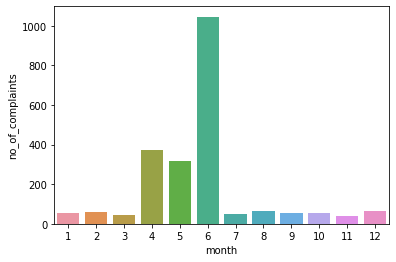

In [17]:
#bar plot using seaborn to get the visuals about the monthly trend about the complaints
sns.barplot(x='month',y='no_of_complaints',data=monthly_graph)

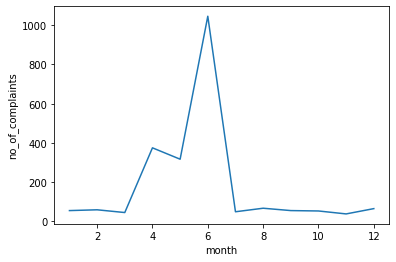

In [18]:
#line plot using seaborn to get the visuals about the monthly trend about the complaints
sns.lineplot(x='month',y='no_of_complaints',data=monthly_graph)

### Trend chart for the number of complaints at daily granularity levels.


C:\Users\Aravind\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


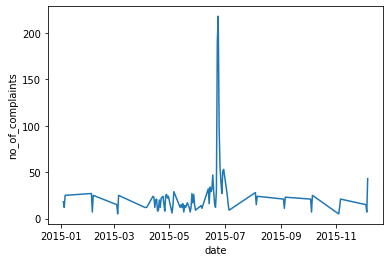

In [19]:
#line plot using seaborn to get the visuals about the dailytrend about the complaints
#try histogram
sns.lineplot(x='date',y='no_of_complaints',data=daily_graph)

### 5. Create a new categorical variable with value as Open and Closed. 

In [20]:
#nstatus new catvariable with value open and close
data["nstatus"] = ["open" if Status=="Open" or Status=="Pending" else "closed" for Status in data["Status"]]  


In [21]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,nstatus
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,closed


### 6. Provide state wise status of complaints in a stacked bar chart

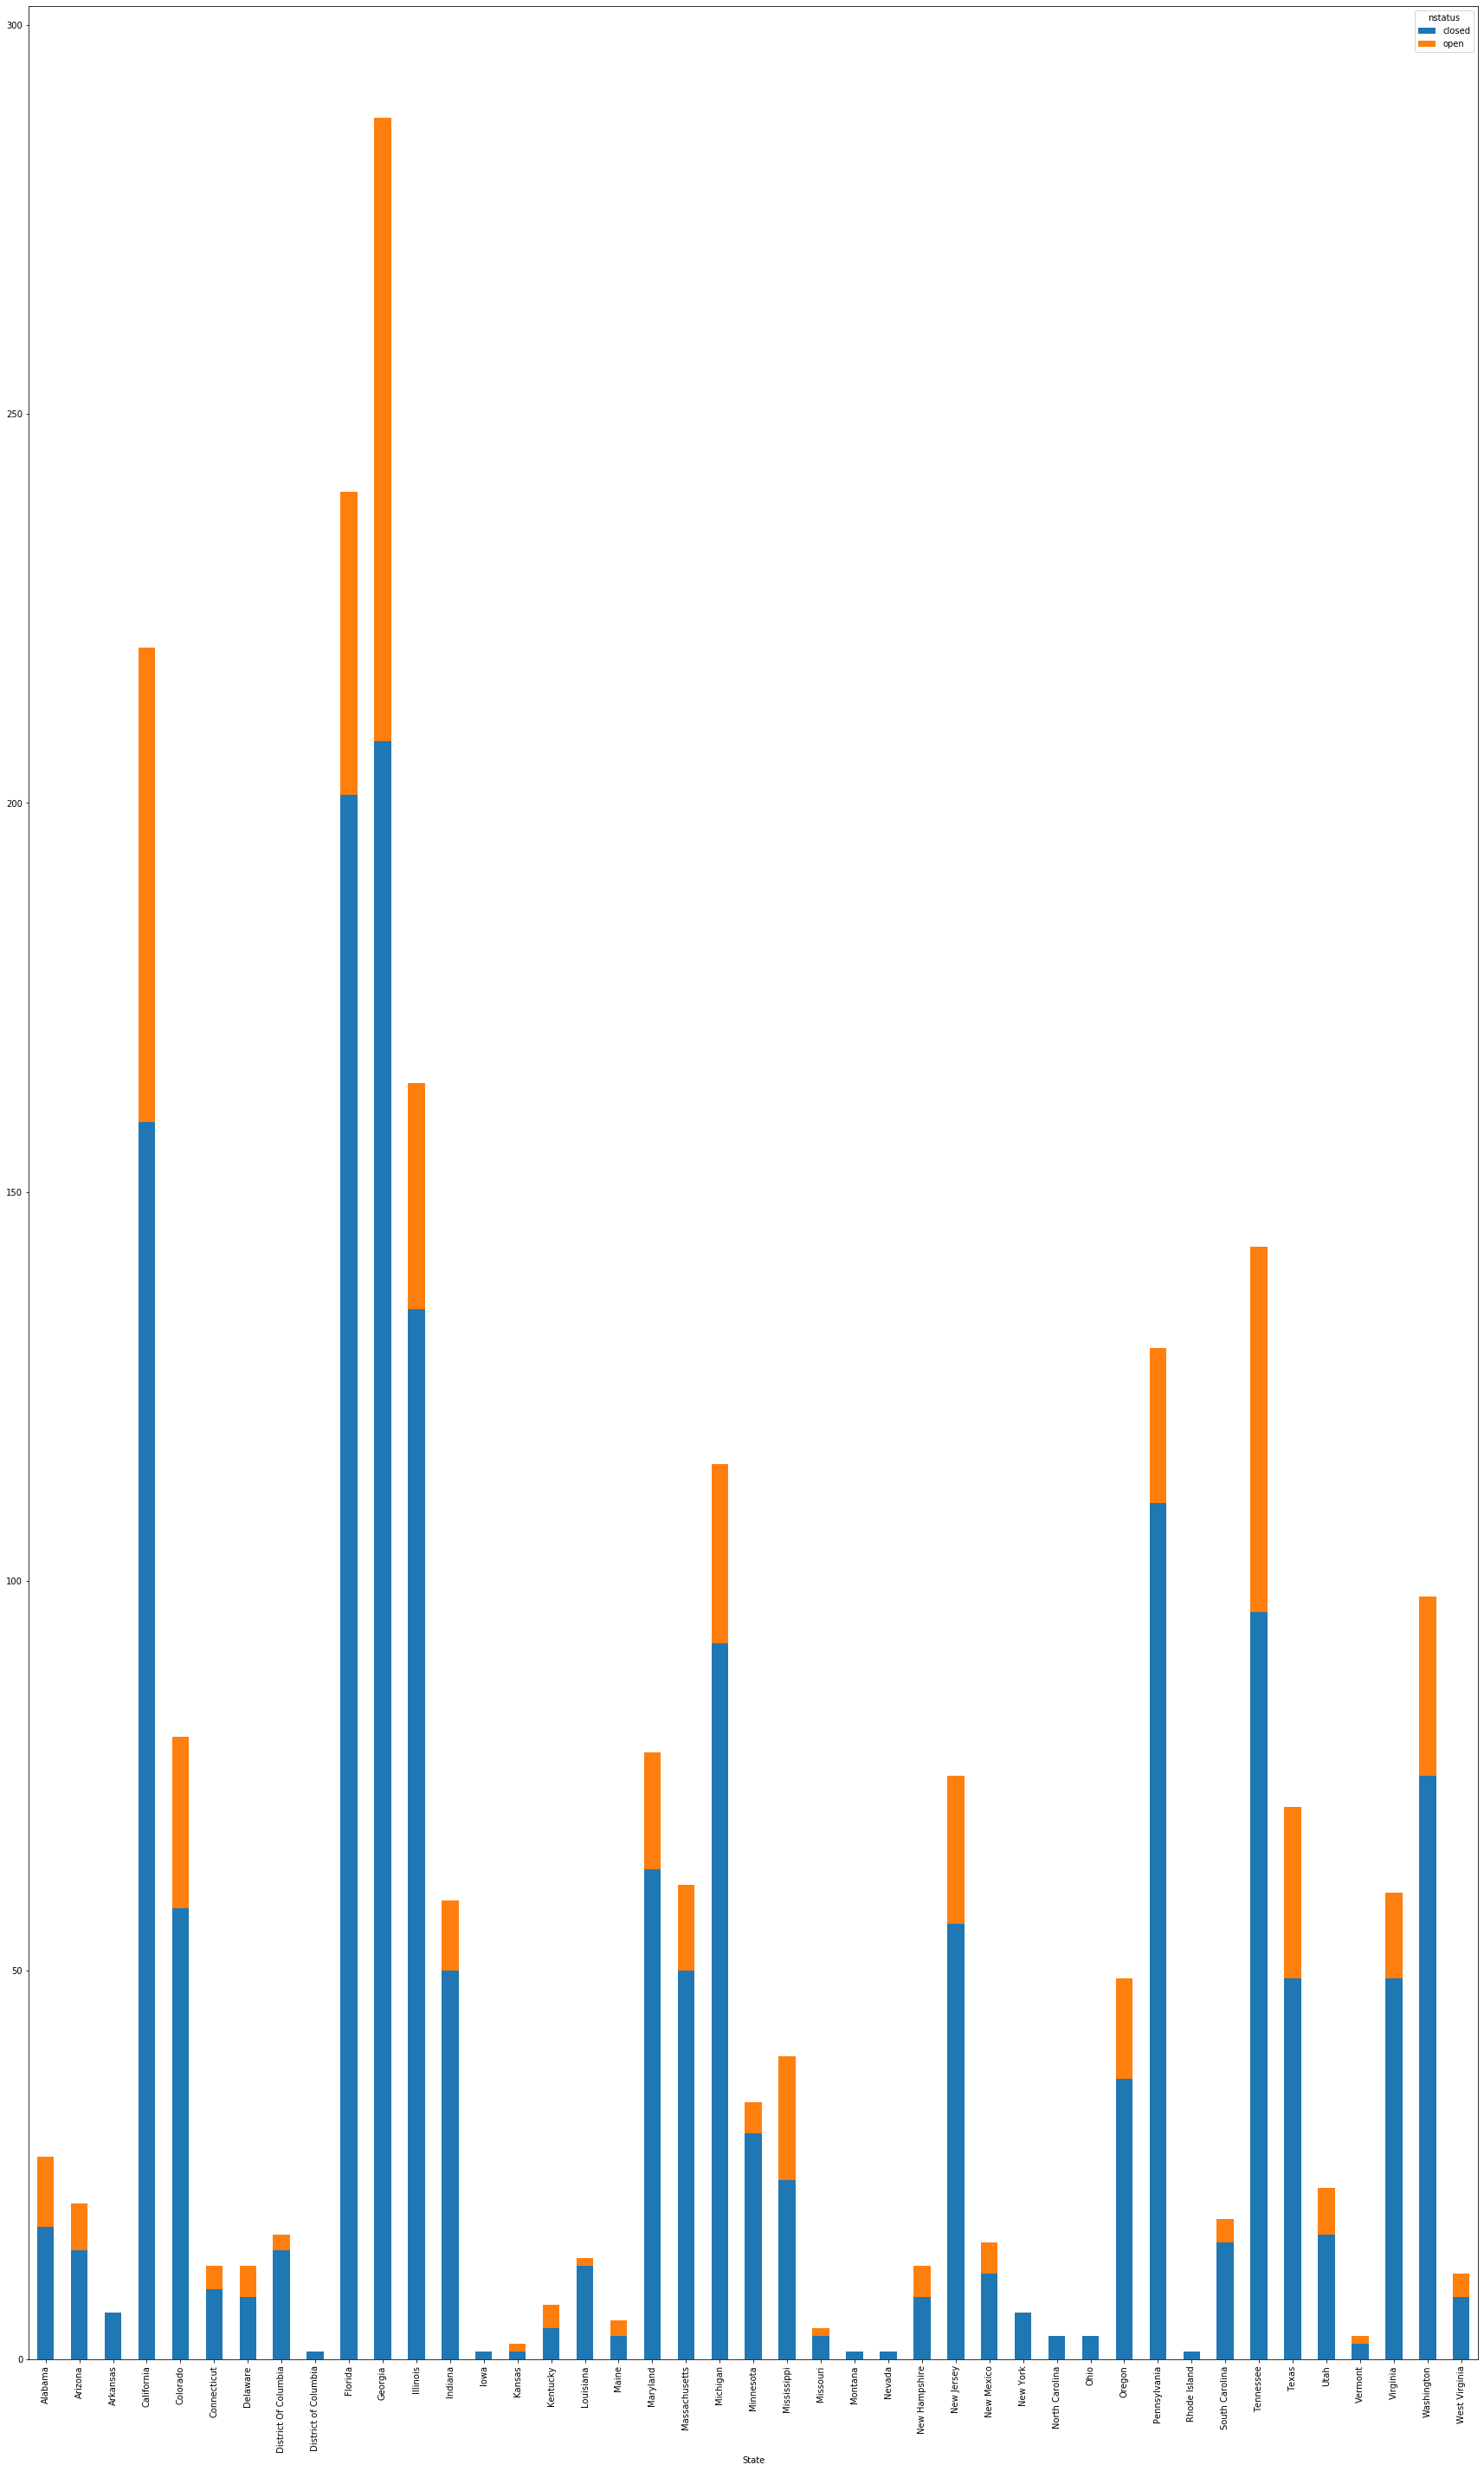

In [22]:
#creating the bar chart based on the count of the complaints in s
#fig=plt.subplots(figsize=(10,10))
#data['State'].value_counts().plot(kind='bar',stacked=True);
stack=data.groupby(["State","nstatus"]).size().unstack().fillna(0)
stack.plot(kind='bar', figsize=(30,50),stacked=True)

#Status_complaints.plot(kind="barh", figsize=(30,50), stacked=True)


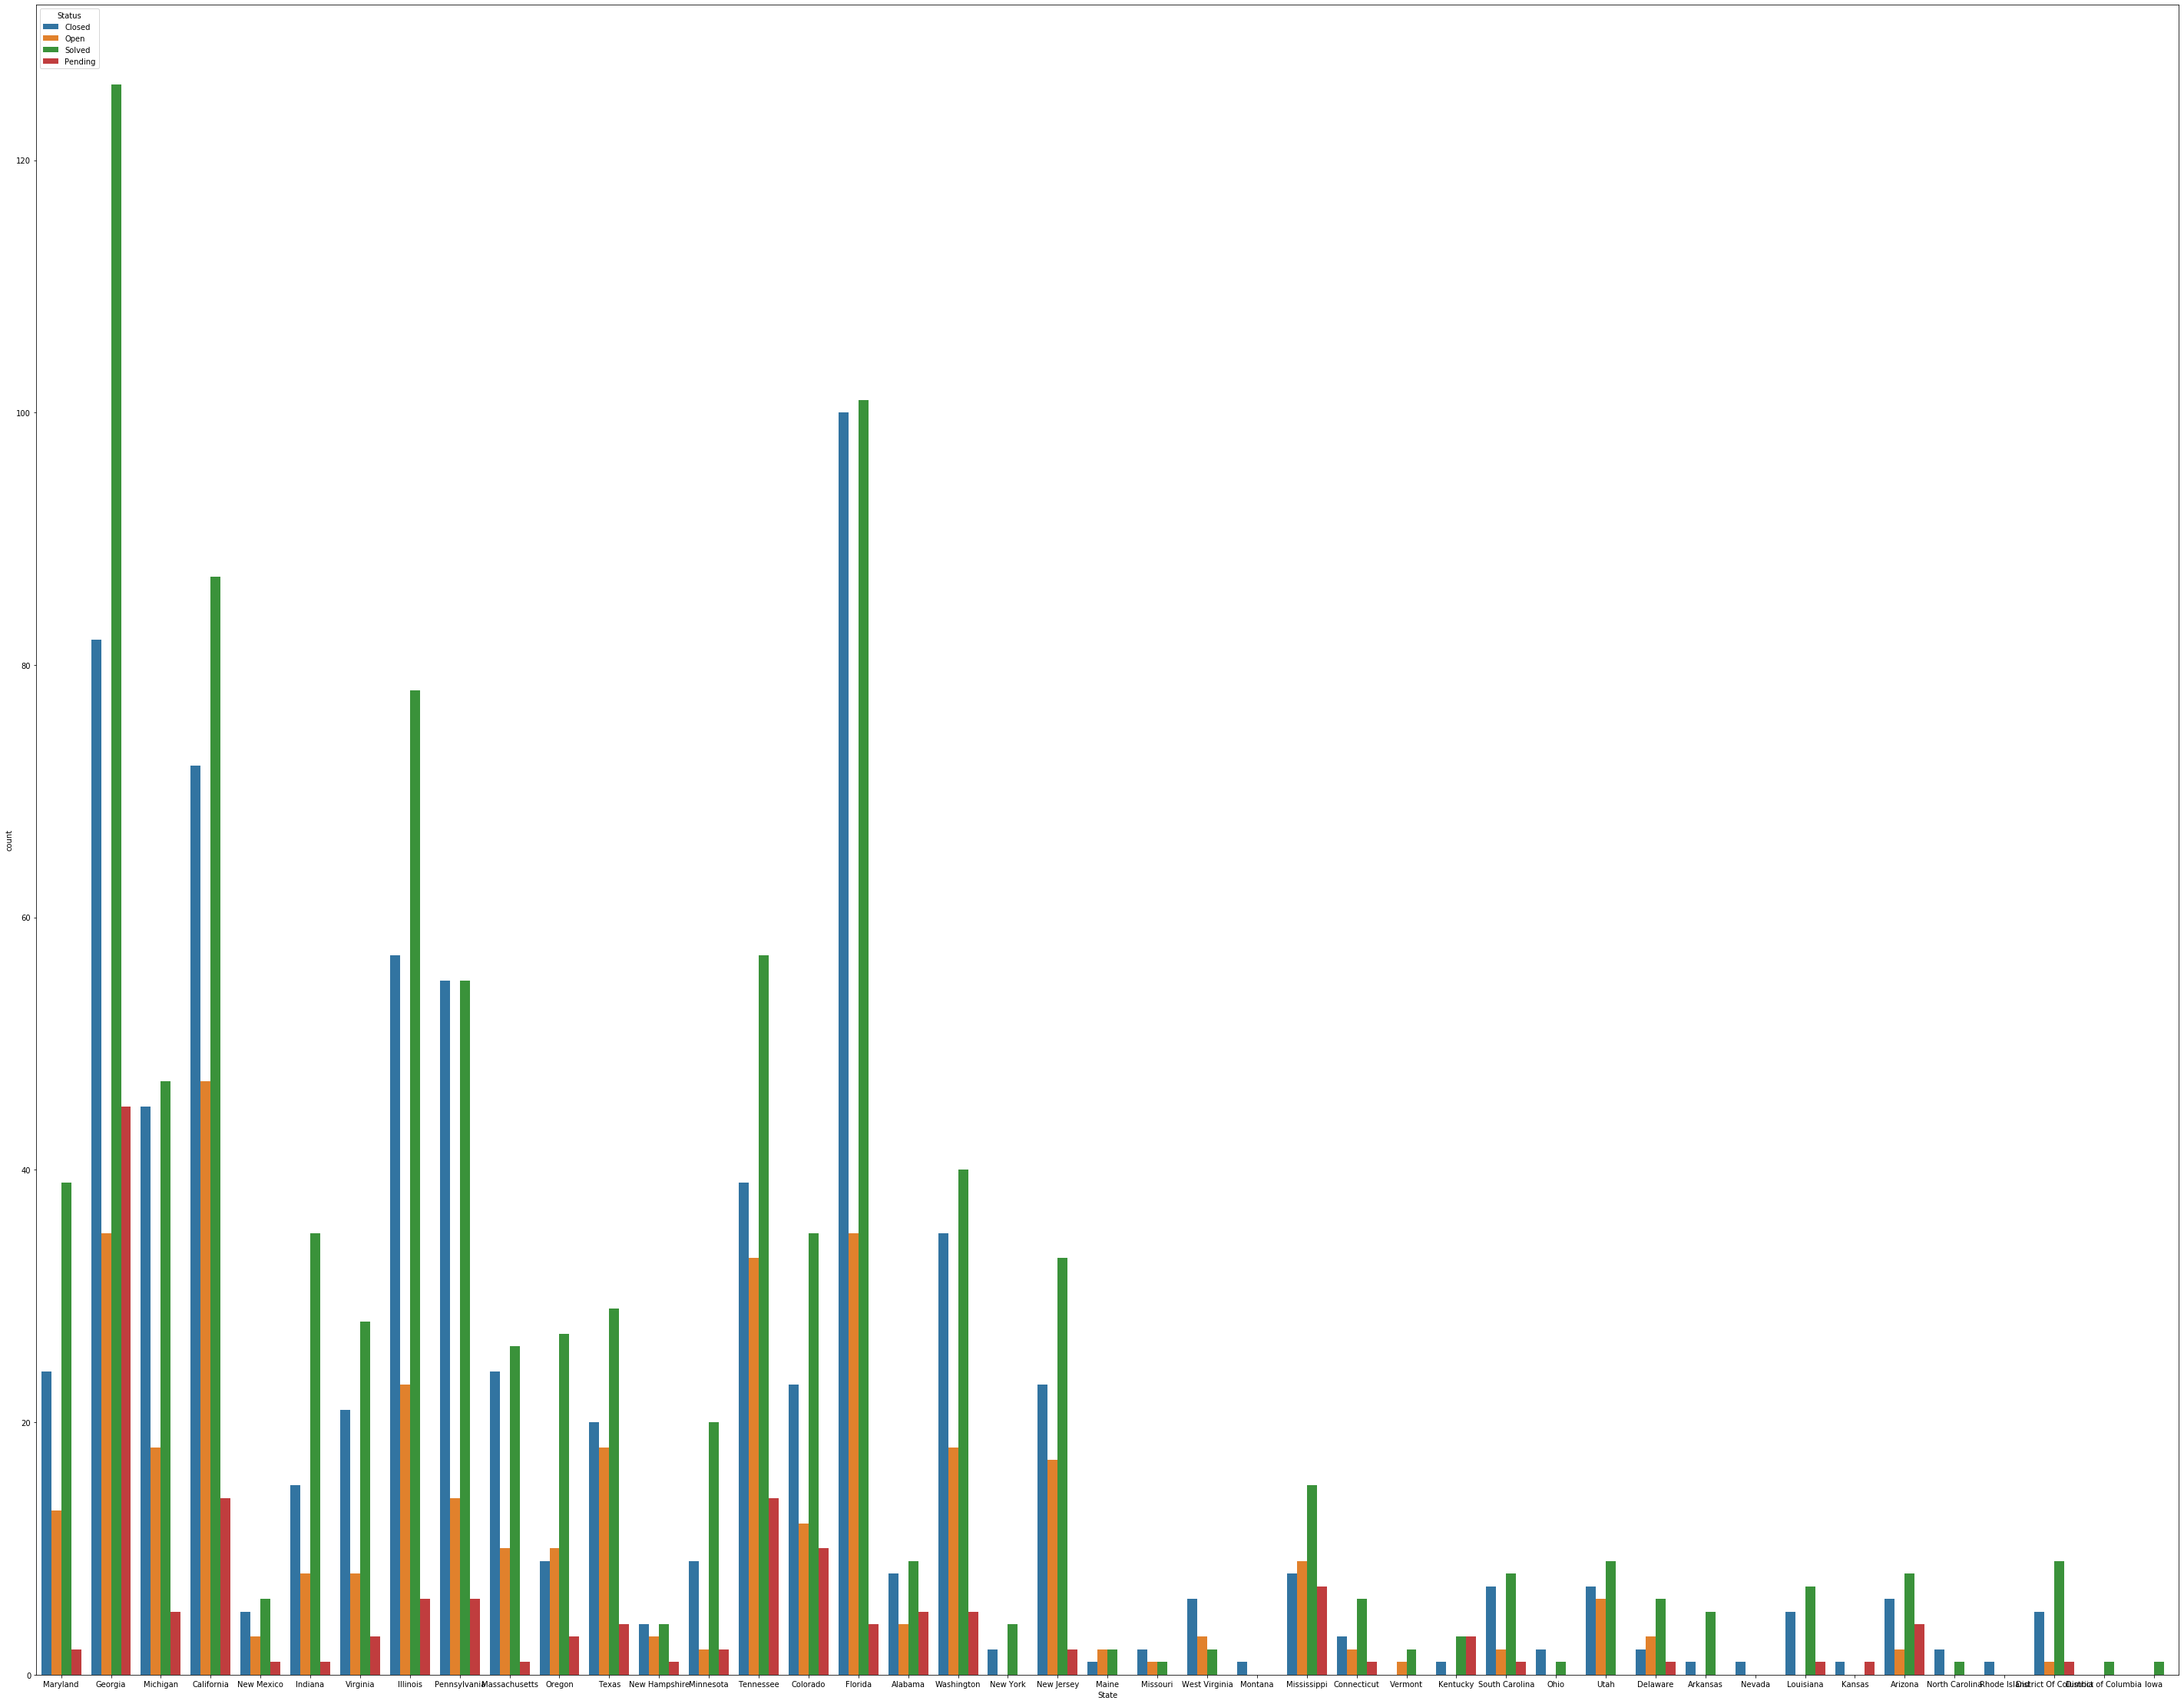

In [23]:
fig=plt.subplots(figsize=(50,40))
sns.countplot(x='State',hue='Status',data=data)



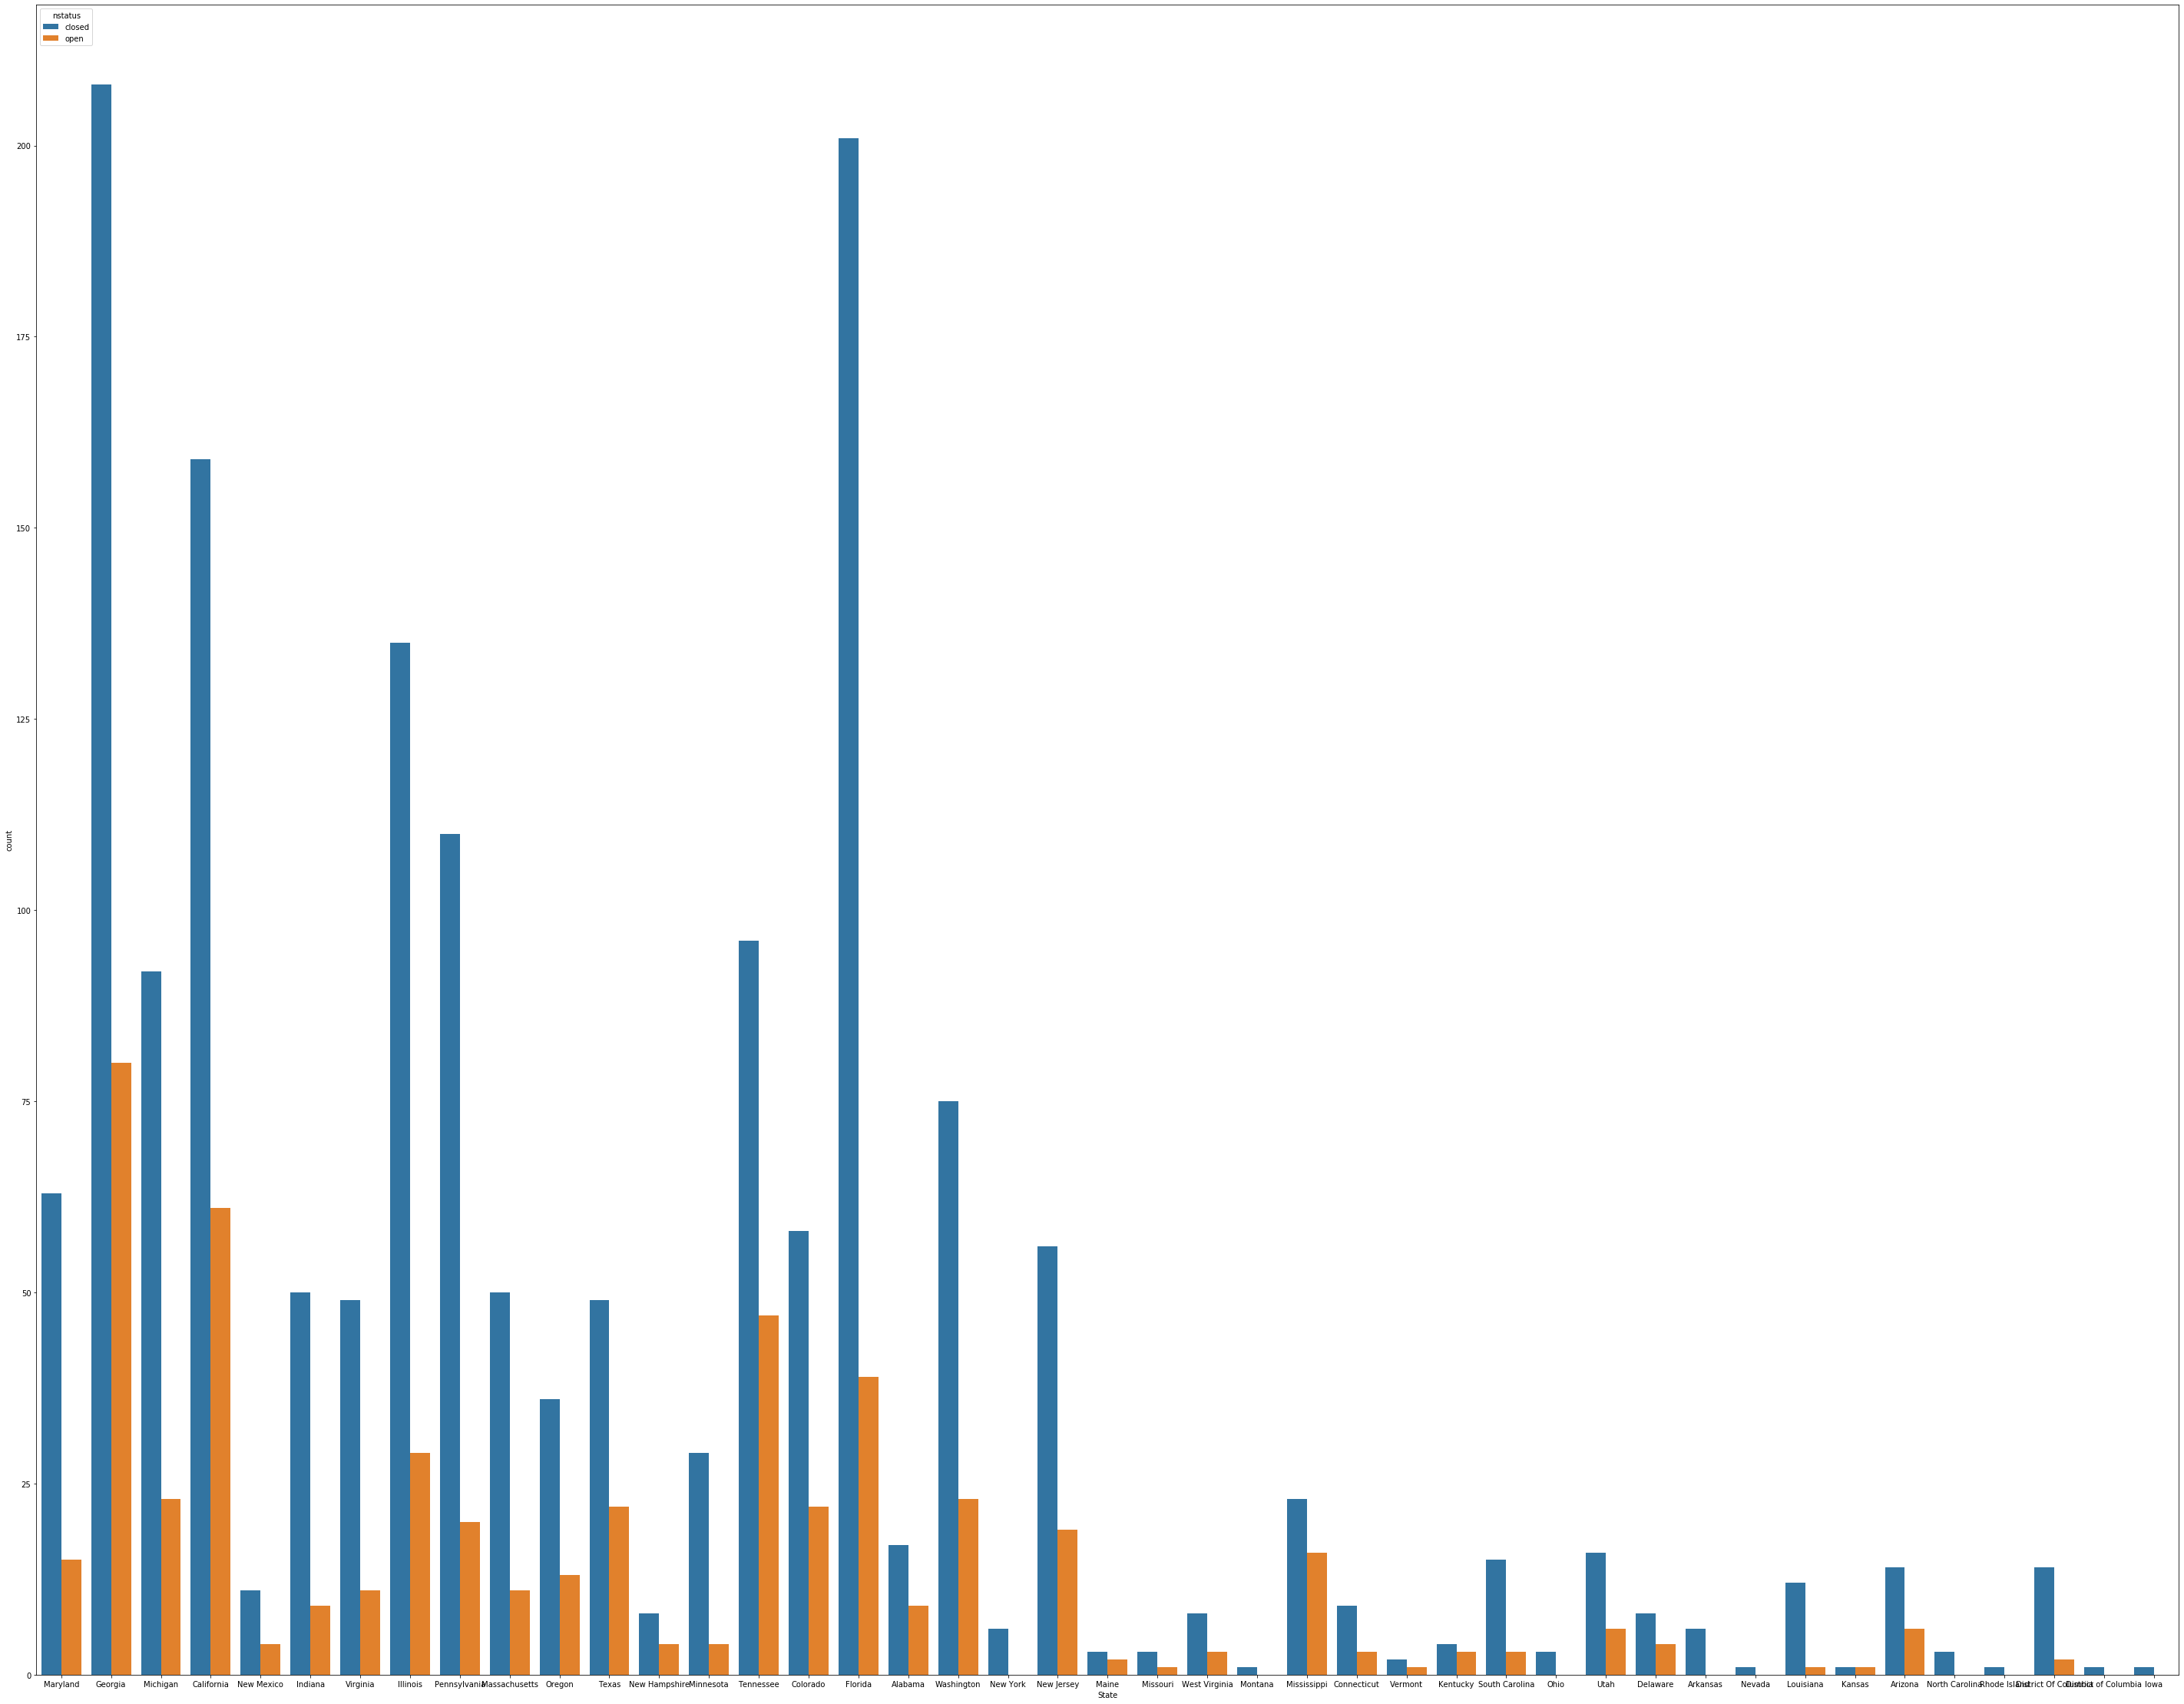

In [24]:
fig=plt.subplots(figsize=(50,40))
sns.countplot(x='State',hue='nstatus',data=data)

### 7a.Which state has the maximum complaints

In [26]:
#a.Which state has the maximum complaints
state_complaint=data.groupby(["State"]).size()
state_complaint.head(20)

State
Alabama                  26
Arizona                  20
Arkansas                  6
California              220
Colorado                 80
Connecticut              12
Delaware                 12
District Of Columbia     16
District of Columbia      1
Florida                 240
Georgia                 288
Illinois                164
Indiana                  59
Iowa                      1
Kansas                    2
Kentucky                  7
Louisiana                13
Maine                     5
Maryland                 78
Massachusetts            61
dtype: int64

In [27]:
max_num=state_complaint.max()
max_state=state_complaint.idxmax()
print("The state which has max complaints is {} and its has {} complaints".format(max_state,max_num))


The state which has max complaints is Georgia and its has 288 complaints


### 7b.State has the highest percentage of unresolved complaints


In [28]:
#unresolved variable has nstatus and state feature gropued together
un_resolved=data.groupby(["State","nstatus"]).size().unstack()#unstack()used to make the longer table to wider table


In [29]:
#we are considering only the open value as the unresolved problem
#un_res_id variable has the id of the maximum state whose "nstatus" value is "open"
#un_res_val variable has the maximum value of "open"
#total_unresolved variable has total number of "open"ie that total number of unresolved
un_res_id=un_resolved['open'].idxmax()
un_res_val=un_resolved['open'].max()
total_unresolved=un_resolved['open'].sum()
un_res_percentage=(un_res_val/total_unresolved)*100


In [30]:
print("State which has higest percentage of unresolved is {} and it has {}%of unresolved complaints".format(un_res_id,un_res_percentage))

State which has higest percentage of unresolved is Georgia and it has 15.473887814313347%of unresolved complaints


### 7 c.Percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [31]:
#d=data.groupby(["State",'Received Via']).size().unstack()
#we are considering only the "closed" value as the resolved value
#resolved variable has Received Vi  and nstatus' feature gropued together
resolved=data.groupby(["Received Via",'nstatus']).size().unstack()
resolved
#complaint_resolved has total number of resolved complaints
complaint_resolved=resolved['closed'].sum()
#totalcomplaint has totalnukmber of the complaints
totalcomplaint=total


In [32]:
complaint_resolved_percent=(complaint_resolved/totalcomplaint)*100
print("The complaint resolved till date which were received through the internet and customer call is around {}%".format(complaint_resolved_percent))

The complaint resolved till date which were received through the internet and customer call is around 76.75359712230215%
